In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

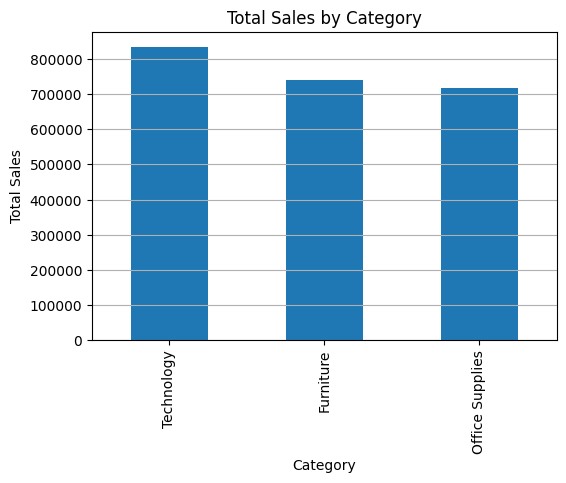

In [14]:
top_categories = (
    df.groupby("Category")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

top_categories.plot(
    kind="bar",
    title="Total Sales by Category",
    figsize=(6,4)
)

plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.grid(axis="y")
plt.show()


In [15]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

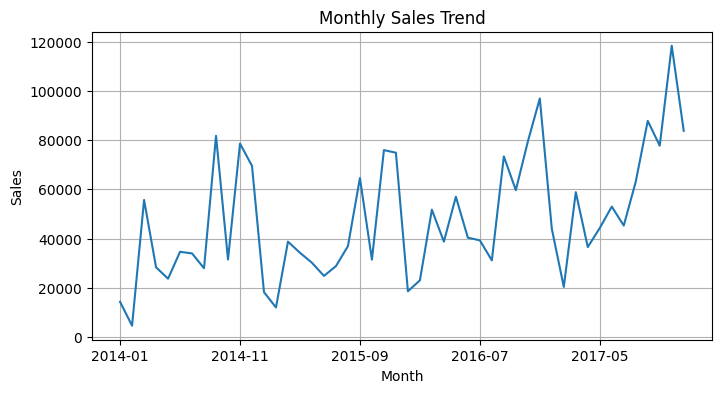

In [16]:
sales_trend = (
    df.groupby(df["Order Date"].dt.to_period("M"))["Sales"]
    .sum()
)

sales_trend.index = sales_trend.index.astype(str)

sales_trend.plot(
    kind="line",
    title="Monthly Sales Trend",
    figsize=(8,4)
)

plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()


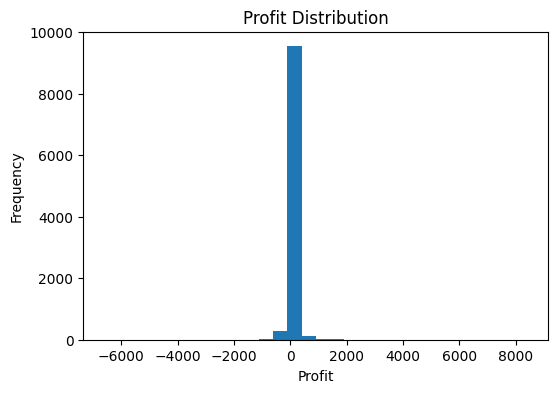

In [17]:
df["Profit"].plot(
    kind="hist",
    bins=30,
    title="Profit Distribution",
    figsize=(6,4)
)

plt.xlabel("Profit")
plt.show()

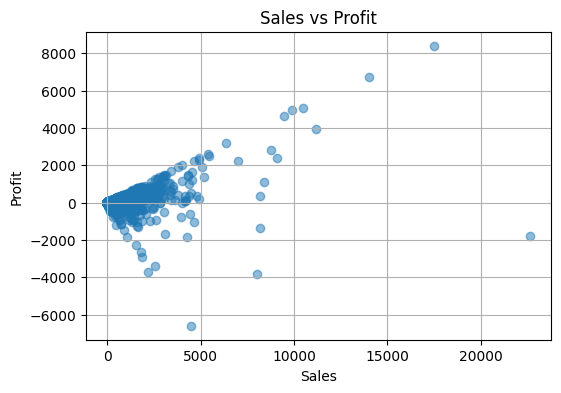

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df["Sales"], df["Profit"], alpha=0.5)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid()
plt.show()


## Key Insights
1. Technology category generates the highest total sales among all categories.
2. Monthly sales show seasonal spikes, indicating high-demand periods.
3. Profit distribution is right-skewed, showing many low-profit orders and few high-profit ones.
